<a href="https://colab.research.google.com/github/khoadangtruong/Customer-Segmentation/blob/master/Mall_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import datetime as dt

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn import metrics, preprocessing
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data_path = '/content/drive/MyDrive/data/Mall_Customers.csv'

df = pd.read_csv(data_path)
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.shape

(200, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.iloc[2, :]

CustomerID                     3
Genre                     Female
Age                           20
Annual Income (k$)            16
Spending Score (1-100)         6
Name: 2, dtype: object

In [ ]:
df.iloc[2, 0]

3

In [ ]:
df.rename(columns = {'Genre': 'Gender'}, inplace = True)

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
gender_df = pd.DataFrame(pd.value_counts(df['Gender']))
gender_df

,Gender
Female,112
Male,88


In [ ]:
sns.set_theme()

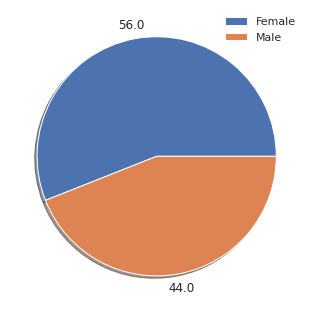

In [ ]:
plt.pie(
    x = gender_df['Gender'],
    labels = None, 
    autopct = '%1.1f',
    pctdistance = 1.12,
    shadow = True
)
plt.legend(labels = gender_df.index, loc = 'best')
plt.show()

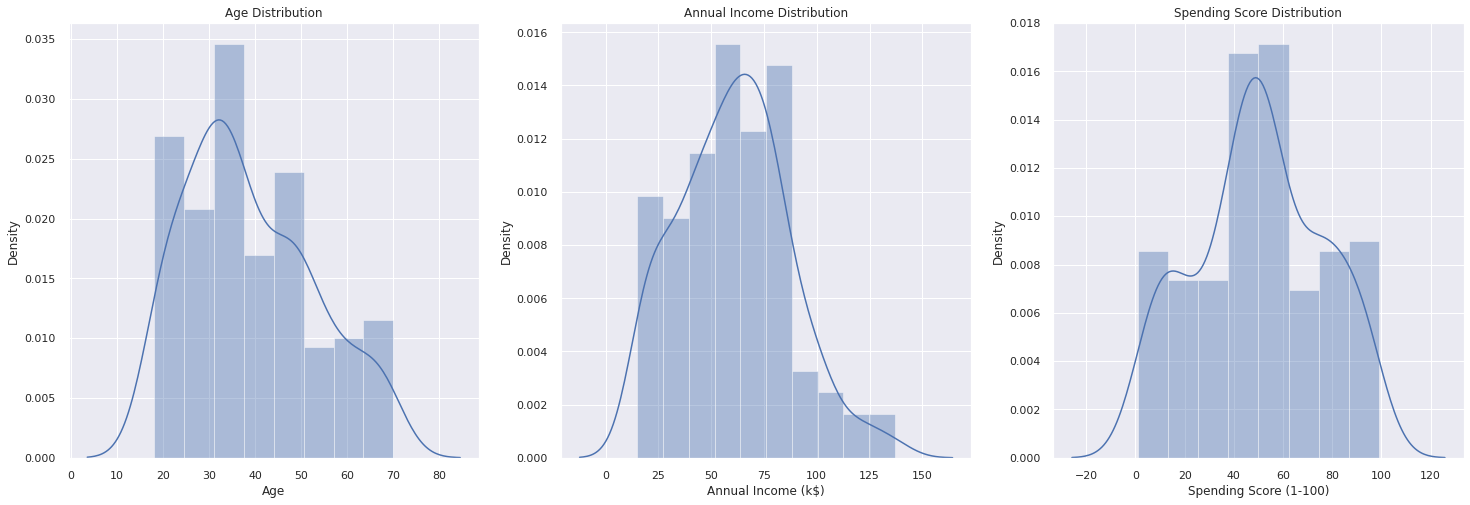

In [ ]:
# fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 8))

# ax1.hist(x = df['Age'])
# ax1.set_title('Age Distribution')

# ax2.hist(x = df['Annual Income (k$)'])
# ax2.set_title('Anual Income Distribution')

# ax3.hist(x = df['Spending Score (1-100)'])
# ax3.set_title('Spending Score Distribution')

fig, axes = plt.subplots(1, 3, figsize = (25, 8))

sns.distplot(df['Age'], ax = axes[0])
axes[0].set_title('Age Distribution')

sns.distplot(df['Annual Income (k$)'], ax = axes[1])
axes[1].set_title('Annual Income Distribution')

sns.distplot(df['Spending Score (1-100)'], ax = axes[2])
axes[2].set_title('Spending Score Distribution')

plt.show()

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


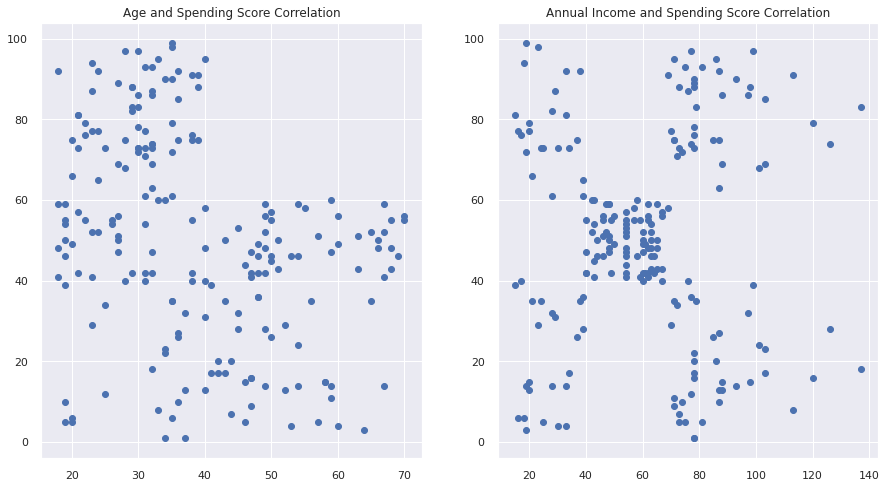

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 8))

ax1.scatter(x = df['Age'], y = df['Spending Score (1-100)'])
ax1.set_title('Age and Spending Score Correlation')

ax2.scatter(x = df['Annual Income (k$)'], y = df['Spending Score (1-100)'])
ax2.set_title('Annual Income and Spending Score Correlation')

plt.show()

In [ ]:
age_score_df = df[['Age', 'Annual Income (k$)']]
age_score_df.head()

,Age,Annual Income (k$)
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17


In [ ]:
X1 = np.asarray(age_score_df[['Age', 'Annual Income (k$)']])
X1[0:5]

array([[19, 15],
       [21, 15],
       [20, 16],
       [23, 16],
       [31, 17]])

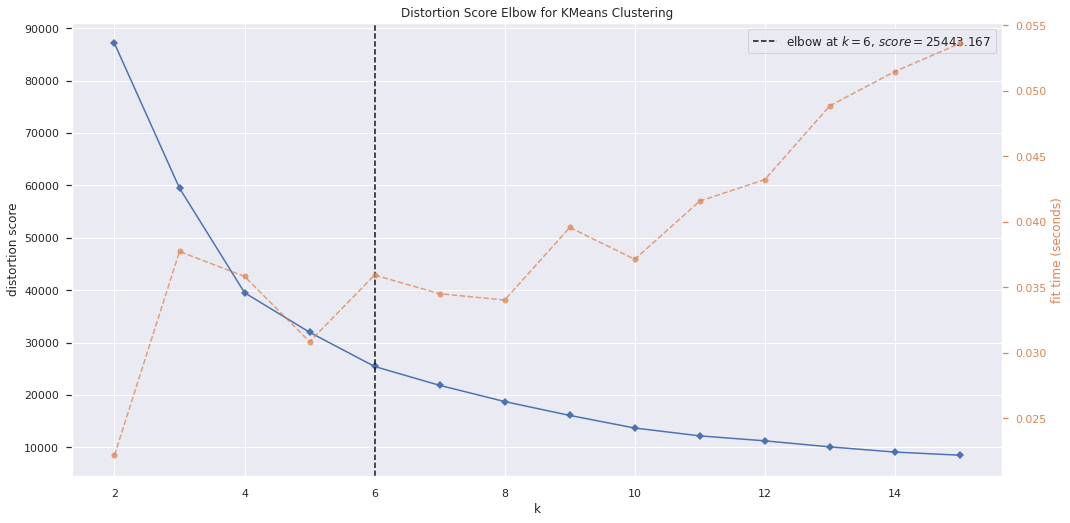

In [ ]:
km1 = KMeans(random_state = 0)
elbow_viz = KElbowVisualizer(km1, k = 15, size = (1200, 600))

elbow_viz.fit(X1)
elbow_viz.show()

In [ ]:
for n_cluster in range(4, 11):
    km1 = KMeans(n_clusters = n_cluster, n_init = 12, max_iter = 200, random_state = 0)
    cluster_labels = km1.fit_predict(X1)

    silhouette_avg = metrics.silhouette_score(X1, cluster_labels)
    print(f'For {n_cluster} clusters - silhouette avg score: {silhouette_avg}')

For 4 clusters - silhouette avg score: 0.43295184273333076
For 5 clusters - silhouette avg score: 0.4024797854680392
For 6 clusters - silhouette avg score: 0.3955316294977378
For 7 clusters - silhouette avg score: 0.38474084268711567
For 8 clusters - silhouette avg score: 0.39093303299008864
For 9 clusters - silhouette avg score: 0.39284783097277776
For 10 clusters - silhouette avg score: 0.4197158825680514


In [ ]:
income_score_df = df[['Annual Income (k$)', 'Spending Score (1-100)']]
income_score_df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [ ]:
X2 = np.array(income_score_df.iloc[:,:])
X2[0:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]])

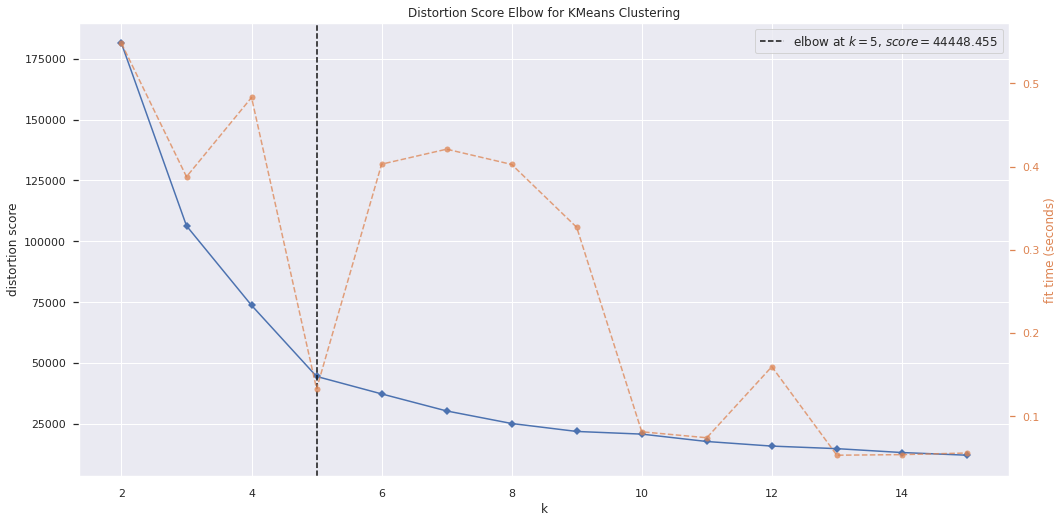

In [ ]:
km2 = KMeans(random_state = 0)
elbow_viz = KElbowVisualizer(km2, k = 15, size = (1200, 600))

elbow_viz.fit(X2)
elbow_viz.show()

In [ ]:
for n_cluster in range(2, 9):
    km2 = KMeans(n_clusters = n_cluster, n_init = 12, max_iter = 200, random_state = 0)
    cluster_labels = km2.fit_predict(X2)

    silhouette_avg = metrics.silhouette_score(X2, cluster_labels)
    print(f'For {n_cluster} cluster - silhouette avg score: {silhouette_avg}')

For 2 cluster - silhouette avg score: 0.2968969162503008
For 3 cluster - silhouette avg score: 0.46761358158775435
For 4 cluster - silhouette avg score: 0.4931963109249047
For 5 cluster - silhouette avg score: 0.553931997444648
For 6 cluster - silhouette avg score: 0.5379675585622219
For 7 cluster - silhouette avg score: 0.5264283703685728
For 8 cluster - silhouette avg score: 0.45704384633565154


In [ ]:
n_clusters = 5
kmean_model = KMeans(n_clusters = n_clusters, n_init = 12, max_iter = 200, random_state = 0)
kmean_model.fit(X2)
labels = kmean_model.labels_
centroid = kmean_model.cluster_centers_

In [ ]:
income_score_df.head(2)

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81


In [ ]:
centroid[0:5]

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

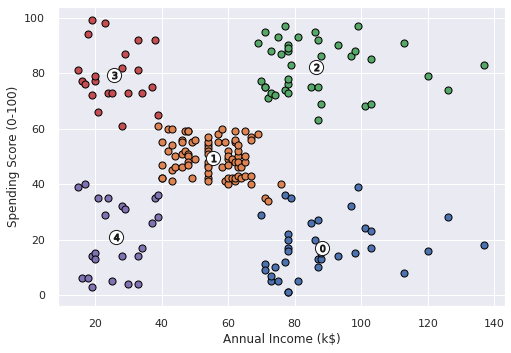

In [ ]:
for label in range(5):
    plt.scatter(X2[labels == label, 0], X2[labels == label, 1], s = 50, edgecolors = 'black')
plt.scatter(centroid[:, 0], centroid[:, 1], marker = 'o', c = "white", alpha = 1, s = 200, edgecolor='k')
for i, c in enumerate(centroid):
    plt.scatter(c[0], c[1], marker = '$%d$' % i, alpha = 1, s = 50, edgecolor='k')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (0-100)')
plt.show()

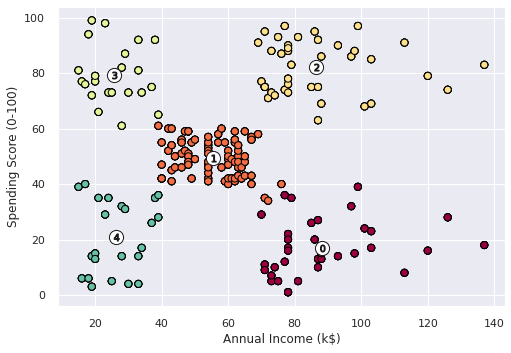

In [ ]:
colors = cm.Spectral(labels.astype(float) / n_clusters)
for label in range(n_clusters):
    plt.scatter(X2[:, 0], X2[:, 1], s = 50, edgecolors = 'black', c = colors)
plt.scatter(centroid[:, 0], centroid[:, 1], marker = 'o', c = "white", alpha = 1, s = 200, edgecolor='k')
for i, c in enumerate(centroid):
    plt.scatter(c[0], c[1], marker = '$%d$' % i, alpha = 1, s = 50, edgecolor='k')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (0-100)')
plt.show()